# Tutorial 2.a: Representing and Evaluating Uncertainty for Classification

This tutorial is an extension to tutorial 1.a. Tutorial 1.a focuses on regression, while the current tutorial focuses on classification. 

Similar to regression, before we start to work with any predictions we must first think about how to represent our prediction. For example, when predicting image classes, we can represent it as a categorical distribution over all possible labels, or as a set of likely labels. Each representation has its pros and cons. Depending on the different requirements during training/deployment, we might even want to convert between different representations. 
<!-- For example, we might initially start from an ensemble prediction (maybe because we trained multiple models), then convert it into a cumulative density function prediction or a point prediction (which are more interpretable and easier to work with). Conversion is one of the main features of torchuq, and we will come back to this topic in a later tutorial.  -->

This notebook aims to introduce some of the popular representations, and metrics to measure the quality of the prediction. 


We first list the types of predictions currently supported by torchuq for classification. You can skip this part and come back later as a reference.  

| Name          |  Variable type/shape  |  Constraint | 
| -----------   |  --------------       |   -------- | 
| Topk          |  `array [batch_size] or [batch_size, k] with int dtype` |  `Each element take values in {0, 1, ..., num_classes}` |                     
| Categorical   | `array [batch_size, num_classes] with float32 dtype` |  |
| Set           | `array [batch_size, num_classes] with int dtype` |   `Elements are 0 or 1`   |
| Ensemble      | `dict: name -> prediction`  | |

Transformations that are available

<!-- | LogProb       |  `array [batch_size, num_classes] with float32 dtype` |  |  -->
    
| | topk | categorical | logprob | set | ensemble | 
| :----: | :-----: | :-----: | :------: | :-----: |  :-----: |
| topk | - 
| categorical | |  - |
| logprob | | | - | 
| set | | | | - | 
| ensemble | | | | | - 

In [1]:
# We first must important the dependencies, and make sure that the torchuq package is in PYTHONPATH
# If you are running this notebook in the original directory as in the repo, then the following statement should work
import sys
sys.path.append('../..')   # Include the directory that contains the torchuq package
import torch  
from matplotlib import pyplot as plt

In [2]:
from torchuq.transform.direct import *
reader = torch.load('pretrained/resnet18-cifar10.pt')
reader['categorical'] = torch.softmax(reader['prob'] * 0.75, dim=1)
reader['set'] = categorical_to_set(reader['categorical'])

### 1. Top-k Prediction

The simplest type of prediction specifies the top-k labels. For example, |

In [3]:
print(reader['categorical'][0])

tensor([4.5591e-04, 2.3169e-04, 4.8663e-04, 9.9696e-01, 3.5859e-04, 5.2882e-04,
        3.4517e-04, 2.6663e-04, 2.4861e-04, 1.1306e-04])


### 2. Categorical Prediction 

In [4]:
from torchuq.evaluate import categorical
import numpy as np

<AxesSubplot:>

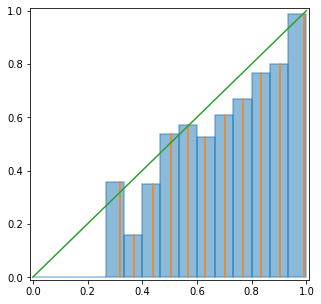

In [7]:
categorical.plot_reliability_diagram(reader['categorical'], reader['labels'], binning='uniform')

In [ ]:
Other functions that could be added, plot_confusion, plot_classwise_calibration, 

Sometimes using the probability is numerically unstable, and it often much more stable to represent and store the logarithm of the probabilities instead. For example, when the probability is $e^{-10}$ or $e^{-20}$, under float32 both could be rounded to $0$, but when they are inputs to an algorithm such as temperature scaling they should lead to different behavior. Torchuq does not use a separate class for log probability, 

### 3. Set Prediction

In [ ]:
def compute_coverage(predictions, labels):
    pass



# Reference Table for All Data Types

In this setup, we consider the case where we make a prediction about some random variable $Y$. We will focus on two setups: regression where $Y$ takes values in $\mathbb{R}$ (e.g. $Y$ could represent tomorrow's temperature in your city); and classification where $Y$ takes values in some discrete set $\mathcal{Y}$ (e.g. $Y$ could represent the object category of an image).



# References

[1] Gneiting, Tilmann. "Making and evaluating point forecasts." Journal of the American Statistical Association 106, no. 494 (2011): 746-762.

[3] Gneiting, Tilmann, and Matthias Katzfuss. "Probabilistic forecasting." Annual Review of Statistics and Its Application 1 (2014): 125-151. 

[4] Kuleshov, Volodymyr, Nathan Fenner, and Stefano Ermon. "Accurate uncertainties for deep learning using calibrated regression." In International Conference on Machine Learning, pp. 2796-2804. PMLR, 2018.